# Analyse GANN training

## Init

Load libraries

In [1]:
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
#sessionInfo()
#reticulate::py_install(packages = 'umap-learn')

Set paths

In [3]:
paths.train_nonorm_path <- "../data/tpm_combined_wheader.csv"
paths.test_nonorm_path <- "../data/tpm_combined_test_wheader.csv"
paths.gen_1_path <- "../data/results/gen_prof_5000.csv"

## Load and visualise

Load unnormalised training data

In [4]:
train_nonorm_raw <- read.table(file=paths.train_nonorm_path, sep=",", row.names = 1, header=TRUE)
head(train_nonorm_raw)

,X1772072276_E05,X914mat_H11,X1772071068_B07,GHA501A161,X1772072285_A02,X1772067078_D01,X1772071037_A07,P1.4.C12,X915mat_A11,X1772067095_E06,⋯,X1772067090_F12,X1772071032_B07,X915mat_F2,P1.5.D10,X819b_A11,X1772071034_E01,X1772067095_C06,AG2pos_70,P1.3.H10,X1772067056_F11
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Rfc3,0.000000,2.185867,0.000000,6.244983,0.000000,0.000000,0.000000,5.312883,0.000000,0,⋯,0.000000,0.000000,0.0000000,0.000000,0.000000,0.000000,0.000000,4.8968410,0.000000,0.000000
Cd47,0.000000,2.201634,2.211667,9.395482,3.794915,0.000000,2.703221,4.848498,3.033863,0,⋯,0.000000,0.000000,0.5058909,5.773733,3.657640,3.906619,3.543340,5.7978315,3.742006,0.000000
Elmo2,0.000000,6.457463,0.000000,1.563180,0.000000,0.000000,0.000000,4.789208,0.000000,0,⋯,0.000000,0.000000,5.3136087,5.969703,5.882399,0.000000,0.000000,0.0000000,4.473787,0.000000
Crip2,5.603894,5.970854,0.000000,0.000000,5.656519,6.397983,7.220371,4.238787,8.365010,0,⋯,7.001264,6.507275,6.4974527,2.140779,8.622308,6.761019,6.112525,5.6597434,5.048759,6.928016
Pprc1,0.000000,6.683135,0.000000,1.976308,0.000000,0.000000,0.000000,5.522935,4.855990,0,⋯,0.000000,0.000000,4.6229304,4.878235,5.195348,0.000000,0.000000,0.0000000,4.032101,0.000000
Ccdc174,5.192658,2.035624,0.000000,2.441693,0.000000,0.000000,3.153980,2.963474,0.000000,0,⋯,0.000000,0.000000,1.2326608,3.927896,5.461070,0.000000,0.000000,0.3565304,1.432959,0.000000


Load unnormalised test data

In [5]:
test_nonorm_raw <- read.table(file=paths.test_nonorm_path, sep=",", row.names = 1, header=TRUE)
head(test_nonorm_raw)

,X1772067078_F01,X1772072256_A04,X915mat_D7,X1772071061_C06,X1772067071_E12,X1772072275_C04,X1772071025_G10,GHA501A99,P1.4.B4,X1772071026_A07,⋯,GHA501A70,P2.1.E11,P1.6.G9,X1772071066_C01,X1772067071_C11,P1.4.D3,X1772067085_C01,X1772067084_E05,X1772067086_A07,X1772071066_E04
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Rfc3,0.000000,0.000000,4.3412742,3.184861,0.000000,0.000000,0,3.921598,0.000000,0.000000,⋯,1.7801001,2.733354,0.000000,0,0.000000,5.057450,0.000000,0.00000,0.000000,0
Cd47,0.000000,4.431887,0.0000000,1.863625,3.542647,0.000000,0,8.581246,5.945093,3.837048,⋯,9.2950091,6.300673,4.323370,0,0.000000,5.549361,3.452111,0.00000,2.307694,0
Elmo2,0.000000,0.000000,0.9259994,0.000000,0.000000,0.000000,0,6.343773,0.000000,3.481645,⋯,0.5416181,5.930737,5.809157,0,3.165435,4.999549,1.537250,0.00000,0.000000,0
Crip2,5.867711,4.772839,7.9027972,6.168253,0.000000,5.438343,0,0.000000,9.175450,6.687053,⋯,0.0000000,3.646163,4.496335,0,6.339514,3.097611,6.441090,6.66738,6.842295,0
Pprc1,0.000000,0.000000,2.6735564,0.000000,0.000000,0.000000,0,2.725903,0.000000,0.000000,⋯,0.2765536,3.224966,4.494416,0,0.000000,3.739848,0.000000,0.00000,0.000000,0
Ccdc174,0.000000,0.000000,0.0000000,0.000000,0.000000,0.000000,0,1.939234,0.000000,4.325534,⋯,5.3613503,3.181103,1.594549,0,0.000000,3.925999,0.000000,0.00000,0.000000,0


Load gen prof-1

In [6]:
genprof_1_raw <- read.table(file=paths.gen_1_path, sep=",", row.names = 1, header=TRUE)
head(genprof_1_raw)

min(genprof_1_raw, na.rm=TRUE)
max(genprof_1_raw, na.rm=TRUE)

,gencell_ep5000_0,gencell_ep5000_1,gencell_ep5000_2,gencell_ep5000_3,gencell_ep5000_4,gencell_ep5000_5,gencell_ep5000_6,gencell_ep5000_7,gencell_ep5000_8,gencell_ep5000_9,⋯,gencell_ep5000_490,gencell_ep5000_491,gencell_ep5000_492,gencell_ep5000_493,gencell_ep5000_494,gencell_ep5000_495,gencell_ep5000_496,gencell_ep5000_497,gencell_ep5000_498,gencell_ep5000_499
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Rfc3,-0.05466713,0.6058278,0.075947050,0.83007190,0.5377388,0.4515401,0.2943457,0.59730150,0.6703820,0.046566606,⋯,0.08347046,0.08120573,0.3939877,-0.05968241,0.49339032,0.8913274,0.168819490,0.4124388,0.002059579,-0.14621656
Cd47,0.18604708,1.2992783,-0.001666832,1.08272480,1.0487566,1.1489296,1.2297466,1.26706240,1.1544499,0.001054764,⋯,0.02319312,0.01146579,0.8302140,1.22886350,1.18608570,1.1063523,-0.024705363,0.9059775,0.183639290,0.91895580
Elmo2,0.81679140,1.2402897,0.898553130,0.42599034,0.9225187,0.2462957,0.8333690,0.62001204,1.1789584,0.905516500,⋯,0.98170567,0.98645043,0.5792866,0.50272846,1.44136710,0.5801315,0.931898100,0.7169437,0.027033567,1.13839910
Crip2,0.95779395,5.1899160,0.127934700,-0.03955207,5.3446383,-0.1583189,-0.1831073,-0.18301149,5.1752543,0.157238960,⋯,-0.12297071,-0.06214807,5.4612494,-0.31512630,4.89968400,0.6287708,-0.041602135,-0.2087993,4.678644700,-0.28313650
Pprc1,0.42652726,-0.1172506,0.725940800,0.25287533,-0.1417735,0.2901366,-0.1596919,-0.01064086,-0.1204319,0.713127730,⋯,0.79397845,0.78436553,-0.1911304,0.14896679,-0.08058987,0.2052004,0.792101500,-0.1534968,-0.187207760,0.54026770
Ccdc174,0.22391105,1.1662180,0.035086155,1.06361750,1.2780161,0.7702579,0.7120073,0.88835716,1.2632966,0.041139483,⋯,-0.00833180,-0.00539918,1.3175564,0.28394854,1.15429850,1.2119069,0.001883626,0.7282186,1.028484600,0.04759085


[1] -1.16184

[1] 7.547134

Create Seurat objects

In [7]:
train_nonorm <- CreateSeuratObject(counts = train_nonorm_raw, project="wgan_train")
train_nonorm

An object of class Seurat 
6807 features across 1798 samples within 1 assay 
Active assay: RNA (6807 features, 0 variable features)

In [8]:
test_nonorm <- CreateSeuratObject(counts = test_nonorm_raw, project="wgan_test")
test_nonorm

An object of class Seurat 
6807 features across 500 samples within 1 assay 
Active assay: RNA (6807 features, 0 variable features)

In [9]:
gen_prof_1 <- CreateSeuratObject(counts = genprof_1_raw, project="gen_prof_1")
gen_prof_1

An object of class Seurat 
6807 features across 500 samples within 1 assay 
Active assay: RNA (6807 features, 0 variable features)

Merge together

In [10]:
data_combined <- merge(train_nonorm, y = list(test_nonorm, gen_prof_1), add.cell.ids = c("Train", "Test", "Gen1"), project = "wgan")
data_combined

An object of class Seurat 
6807 features across 2798 samples within 1 assay 
Active assay: RNA (6807 features, 0 variable features)

In [11]:
table(data_combined$orig.ident)


   gencell  wgan_test wgan_train 
       500        500       1798 

## Perform QC

In [12]:
# Look at some canonical marker genes and metrics
#VlnPlot(train_nonorm,c("ENSMUSG00000000001","ENSMUSG00000000056","ENSMUSG00000000058","ENSMUSG00000000078"))

## Normalise and scale data

In [13]:
data_combined <- NormalizeData(data_combined)

In [14]:
data_combined <- FindVariableFeatures(data_combined, selection.method = "vst", nfeatures = 2000)

In [15]:
all.genes <- rownames(data_combined)
data_combined <- ScaleData(object = data_combined, features = all.genes)

Centering and scaling data matrix



## Dim reduction

In [16]:
data_combined <- RunPCA(object = data_combined, features = VariableFeatures(object = data_combined))

Warning message in PrepDR(object = object, features = features, verbose = verbose):
“The following 155 features requested have zero variance (running reduction without them): Fam25c, Sprr1a, Rpl34-ps1, Mt4, Orm1, Krt15, Krt79, Gm4832, Klk7, Asprv1, Cdsn, Crabp2, Krt5, Mt2, Soat1, Cldn4, Gjb2, Ucp2, Sdr16c5, Ivl, Twf1, Alox12e, Aqp3, Dmkn, Krt75, Rhoc, Stmn1, Pex1, Tacstd2, Spry2, Arhgdib, Tgm5, Calml3, Acer1, Ly6g6e, Aldh3b2, Grhl3, Serpinb2, Dlx3, Aldh3a1, Gm973, Adamts1, Gsto1, Lmo1, Skint6, Atp6v0c, Lfng, Phgdh, Clca1, Lypd3, Bdh1, Shisa2, Igfbp4, Foxq1, Ephx3, Npl, Slc7a5, Clic3, Tbx1, Gm5148, Moxd1, Bhlhe40, Tns1, Tmem176b, Clu, Mgst3, Pdlim1, Dut, Dkk3, Tmem45a, Stap2, Car12, Timp3, Mcm7, Prdm1, Cers3, Lgr5, Ptgs1, Clca2, Uqcr10, Metrnl, Ccnd1, Sult5a1, Morf4l1, Adamtsl4, Plbd1, Tnfrsf18, Cyp2j6, Ggh, Nfyc, Ackr4, Wnt3, Gli3, Phpt1, Paics, Zc3hav1, Col17a1, Plch2, Chchd6, Cers2, Sptlc3, Gstz1, Itga3, Cotl1, Fdps, Nrarp, Slc27a3, Bbox1, C1qbp, Nme3, Blnk, Msx2, Pkm, Ehd2, Dusp1, T

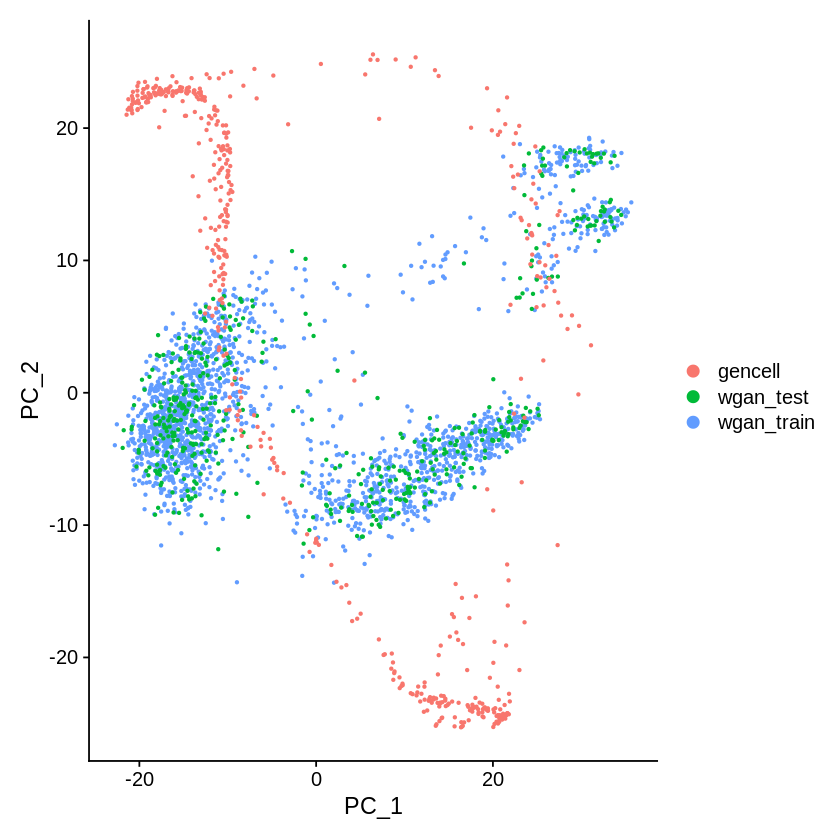

In [17]:
DimPlot(data_combined, reduction = "pca")

In [18]:
data_combined <- RunTSNE(object = data_combined, dims = 3:10)

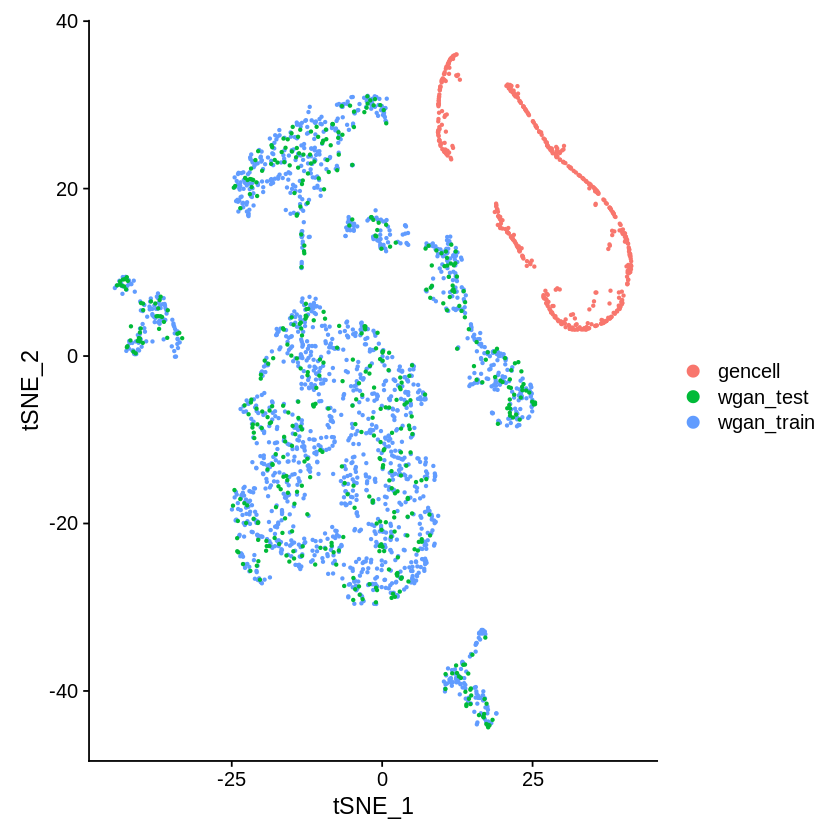

In [19]:
DimPlot(data_combined, reduction = "tsne")